In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
banks_df = pd.read_csv('Датасет банки.csv', sep = ';')
banks_df

,id_client,flag_coll,amt_credit,bki,age,is_educ,cl_segm,credit_type,fssp,cnt_closed_contract,is_cellphone
0,1000001,1.0,225000.0,26395.0,68.0,0.0,2.0,CC,0.0,0.0,0.0
1,1000002,0.0,75000.0,89146.0,69.0,1.0,2.0,POS,0.0,1.0,1.0
2,1000003,0.0,10000.0,35635.0,56.0,1.0,3.0,CC,0.0,0.0,1.0
3,1000004,0.0,400000.0,60715.0,36.0,1.0,2.0,POS,0.0,0.0,0.0
4,1000005,1.0,175000.0,38110.0,48.0,0.0,2.0,POS,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9563,1009564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9564,1009565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9565,1009566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9566,1009567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Проверяем на наличие странных значений

In [3]:
banks_df['flag_coll'].value_counts() #обнаружились значения -1 и -2
banks_df.drop(banks_df[banks_df['flag_coll'] < 0].index, inplace = True)
banks_df['flag_coll'].value_counts()

0.0    5692
1.0    3702
Name: flag_coll, dtype: int64

In [4]:
banks_df['flag_coll'].isna().sum() #есть пропущенные данные в flag coll
banks_df.dropna(inplace = True) #удалим пропущенные данные сразу из всех строк
banks_df.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9356 entries, 0 to 9360
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_client            9356 non-null   int64  
 1   flag_coll            9356 non-null   float64
 2   amt_credit           9356 non-null   float64
 3   bki                  9356 non-null   float64
 4   age                  9356 non-null   float64
 5   is_educ              9356 non-null   float64
 6   cl_segm              9356 non-null   float64
 7   credit_type          9356 non-null   object 
 8   fssp                 9356 non-null   float64
 9   cnt_closed_contract  9356 non-null   float64
 10  is_cellphone         9356 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 877.1+ KB


Смотрим графики признаков

In [5]:
banks_df['paid_in_time'] = 1 - banks_df['flag_coll']

<AxesSubplot:xlabel='amt_credit'>

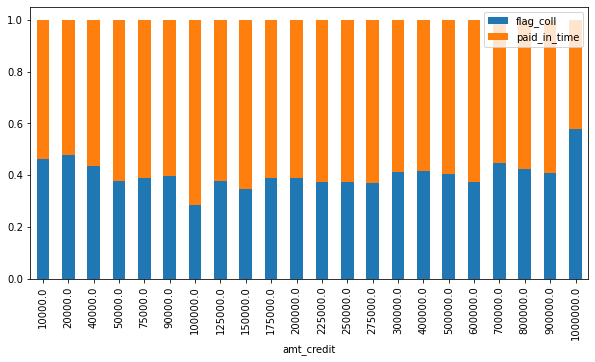

In [6]:
banks_df.groupby('amt_credit').agg('mean')[['flag_coll', 'paid_in_time']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)
#важный признак!

<AxesSubplot:xlabel='bki'>

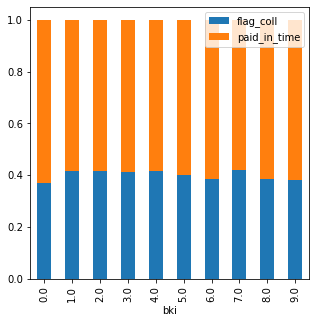

In [7]:
banks_df.groupby(banks_df['bki'] // 10_000).agg('mean')[['flag_coll', 'paid_in_time']].plot(kind='bar',
                                                           figsize=(5, 5),
                                                           stacked=True)

<AxesSubplot:xlabel='age'>

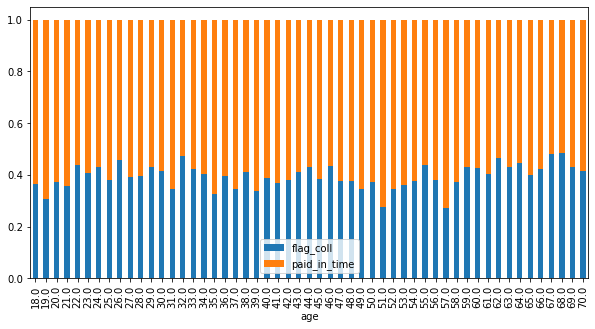

In [8]:
banks_df.groupby('age').agg('mean')[['flag_coll', 'paid_in_time']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

<AxesSubplot:xlabel='is_educ'>

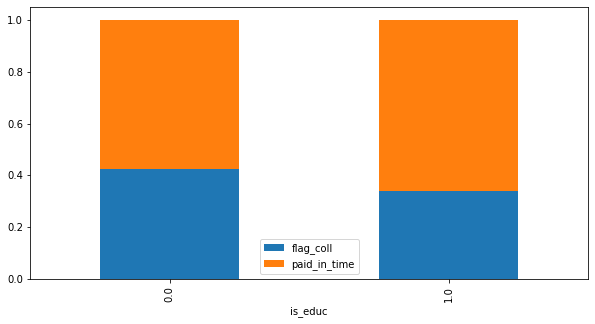

In [9]:
banks_df.groupby('is_educ').agg('mean')[['flag_coll', 'paid_in_time']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

<AxesSubplot:xlabel='cl_segm'>

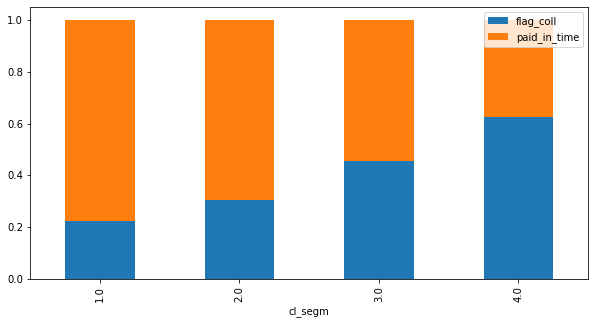

In [10]:
banks_df.groupby('cl_segm').agg('mean')[['flag_coll', 'paid_in_time']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

<AxesSubplot:xlabel='credit_type'>

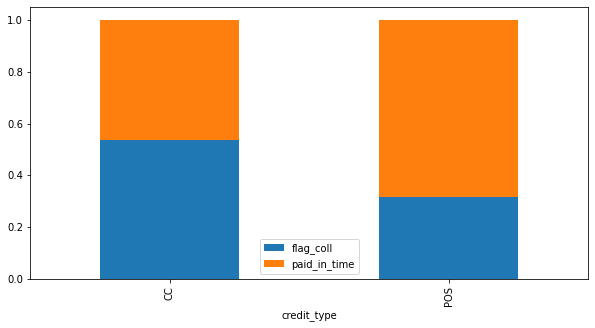

In [11]:
banks_df.groupby('credit_type').agg('mean')[['flag_coll', 'paid_in_time']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

<AxesSubplot:xlabel='cnt_closed_contract'>

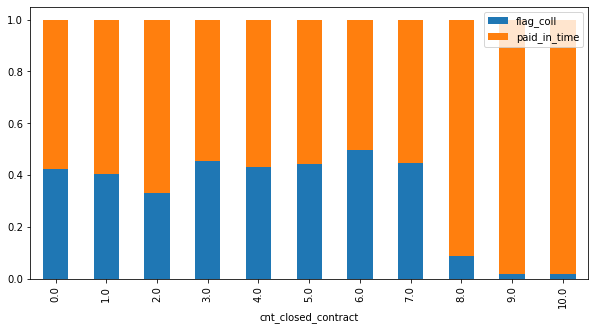

In [12]:
banks_df.groupby('cnt_closed_contract').agg('mean')[['flag_coll', 'paid_in_time']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

<AxesSubplot:xlabel='is_cellphone'>

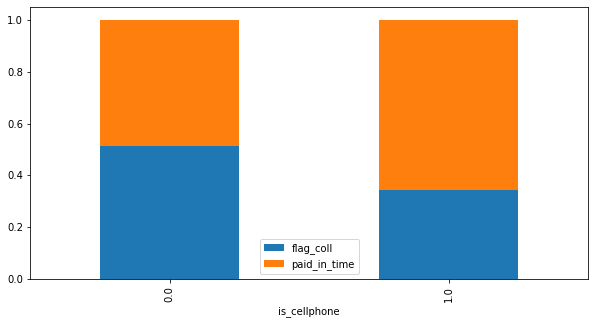

In [13]:
banks_df.groupby('is_cellphone').agg('mean')[['flag_coll', 'paid_in_time']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

<AxesSubplot:xlabel='fssp'>

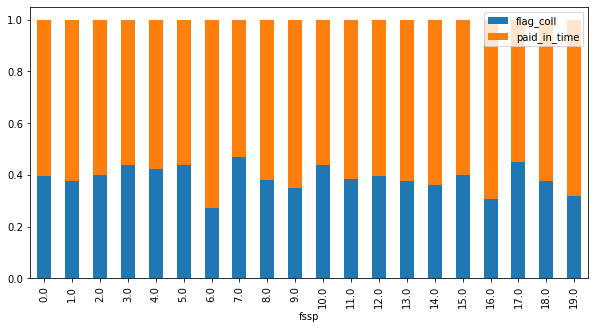

In [14]:
banks_df.groupby(banks_df['fssp'] // 10_000).agg('mean')[['flag_coll', 'paid_in_time']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

In [15]:
banks_df['credit_type'].value_counts()

POS    6082
CC     3274
Name: credit_type, dtype: int64

In [16]:
banks_df.credit_type = banks_df.credit_type.map({'POS':0, 'CC':1, 'nan':'NaN'})
banks_df.head()

,id_client,flag_coll,amt_credit,bki,age,is_educ,cl_segm,credit_type,fssp,cnt_closed_contract,is_cellphone,paid_in_time
0,1000001,1.0,225000.0,26395.0,68.0,0.0,2.0,1,0.0,0.0,0.0,0.0
1,1000002,0.0,75000.0,89146.0,69.0,1.0,2.0,0,0.0,1.0,1.0,1.0
2,1000003,0.0,10000.0,35635.0,56.0,1.0,3.0,1,0.0,0.0,1.0,1.0
3,1000004,0.0,400000.0,60715.0,36.0,1.0,2.0,0,0.0,0.0,0.0,1.0
4,1000005,1.0,175000.0,38110.0,48.0,0.0,2.0,0,0.0,1.0,1.0,0.0


Делим на тест и контроль

In [17]:
#делим на тест и контроль
X_train, X_test, y_train, y_test = train_test_split(
    banks_df.drop(['flag_coll', 'paid_in_time'], axis=1),
    banks_df.flag_coll,
    test_size= 0.2,
    train_size = 0.8,
    random_state=0,
    stratify=banks_df.flag_coll
)

In [18]:
#фитим модель
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
#предсказывает значение таргета в тесте
y_pred = tree.predict(X_test)

In [20]:
#смотрим точность предсказания таргета с тесте
acc = accuracy_score(y_test,y_pred)
print(acc)

0.6511752136752137


In [21]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[813, 321],
       [332, 406]], dtype=int64)

Посмотрим, как изменяется accuracy в зависимости от размера тестовой и тренинговой выборки

In [22]:
acc_list = []
for i in range(1, 10):
    X_train, X_test, y_train, y_test = train_test_split(
    banks_df.drop(['flag_coll', 'paid_in_time'], axis=1),
    banks_df.flag_coll,
    test_size= i * 0.1,
    random_state=0,
    stratify=banks_df.flag_coll
)
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_list.append(acc)

In [23]:
acc_list

[0.6399572649572649,
 0.6485042735042735,
 0.6465977912361952,
 0.644402885386054,
 0.6325352714835399,
 0.6416102600641254,
 0.6370992366412214,
 0.6408817635270541,
 0.6196413727585798]

Text(0, 0.5, 'Точность модели')

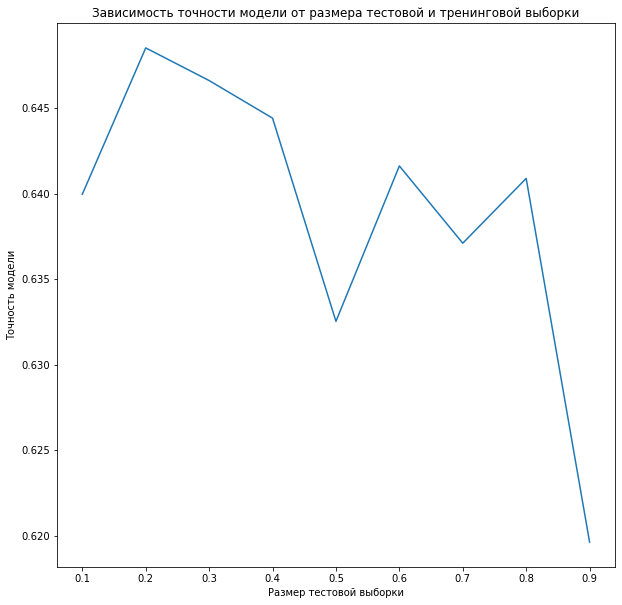

In [24]:
plt.figure(figsize = [10, 10])
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], acc_list)
plt.title('Зависимость точности модели от размера тестовой и тренинговой выборки')
plt.xlabel('Размер тестовой выборки')
plt.ylabel('Точность модели')

<AxesSubplot:>

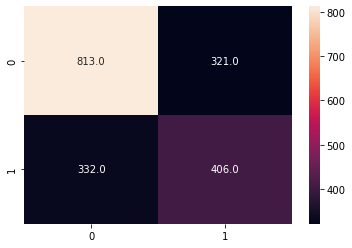

In [25]:
sns.heatmap(cm, annot = True, fmt='.1f')